### 安装 <a href="http://tushare.org/index.html">tushare</a> 
    pip install tushare
 

In [123]:
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
import numpy as np
import talib as talib
import pandas as pd
import datetime as dt


df = ts.get_k_data('002408', ktype='60',autype="qfq",index=False)

#RSI
df["rsi"] = talib.RSI(df['close'].values, timeperiod=9)
df["macd"],df["signal"],df["hist"] = talib.MACD(df['close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
 


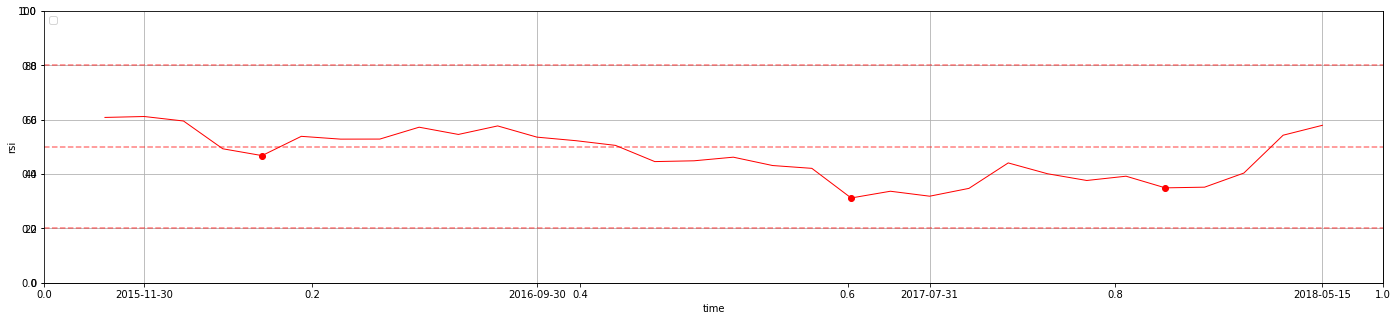

In [147]:
data = ts.get_k_data('002023', ktype='m',autype="qfq",index=False,start='2015-01-01', end='2018-05-15')
#RSI
data["rsi"] = talib.RSI(data['close'].values, timeperiod=9)
#绘制RSI线图
 
fig, ax = plt.subplots(figsize=(24,5))
#设置坐标轴范围
plt.xlabel('time')
plt.ylabel('rsi')
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(data['date']), 10))
ax.set_xticklabels(data['date'][::10])
ax.legend(loc='upper left')

#设置坐标轴范围
#plt.xlim((-5, 5))
plt.ylim((0, 100))

plt.plot(data["date"],data["rsi"],color='red', linewidth=1.0, linestyle='-')
plt.axhline(80,alpha=0.5,color='red',linestyle='--') 
plt.axhline(50,alpha=0.5,color='red',linestyle='--') 
plt.axhline(20,alpha=0.5,color='red',linestyle='--') 

rsi = data["rsi"]
#3日内的低点
rsi_Low= rsi[rsi<rsi.shift(3)][rsi<rsi.shift(2)][rsi<rsi.shift(1)][rsi<rsi.shift(-1)][rsi<rsi.shift(-2)][rsi<rsi.shift(-3)] 
rsi_Low = rsi_Low.dropna()
plt.plot(rsi_Low.index.values,rsi_Low.values,'o',color='red')

#低点的低点
rsi_Low_Low = rsi_Low  [ rsi_Low.shift(2) > rsi_Low ]   [ rsi_Low.shift(1) > rsi_Low ]   [ rsi_Low.shift(-1) > rsi_Low ]   [ rsi_Low.shift(-2) > rsi_Low ]       
rsi_Low_Low= rsi_Low_Low.dropna()
plt.plot(rsi_Low_Low.index.values,rsi_Low_Low.values-rsi_Low_Low.values+2,'s',color='red')
plt.grid()


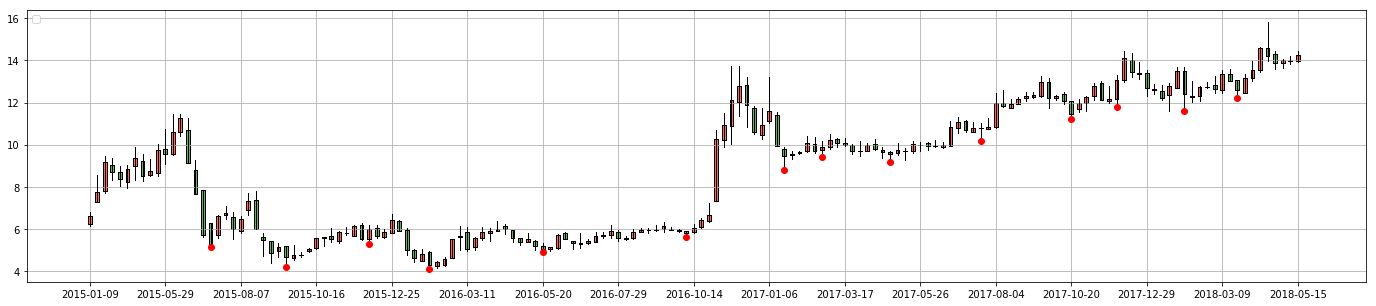

In [137]:
#绘制K线图
fig = plt.figure(figsize=(24, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(data['date']), 10))
ax.set_xticklabels(data['date'][::10])
ax.legend(loc='upper left')

mpf.candlestick2_ochl(ax, data['open'], data['close'], data['high'], data['low'],width=0.5, colorup='r', colordown='green',alpha=0.6)
plt.grid()

low = data["low"]
low_Low= low[low<low.shift(3)][low<=low.shift(2)][low<=low.shift(1)][low<=low.shift(-1)][low<=low.shift(-2)][low<=low.shift(-3)] 
low_Low = low_Low.dropna()
#画出低点
plt.plot(low_Low.index.values,low_Low.values,'o',color='red')

In [142]:
#找底背离点
data[ data["low"].shift(1)>data["low"] ]  [ data["rsi"].shift(1)<data["rsi"]  ]

/data/huanghan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,date,open,close,high,low,volume,code,rsi
33,2015-11-06,5.430,5.867,5.898,5.359,673850.0,002408,51.227921
35,2015-11-20,5.684,6.156,6.210,5.666,847274.0,002408,55.237606
37,2015-12-04,5.524,6.001,6.188,5.292,686457.0,002408,52.726983
53,2016-04-01,5.796,5.916,6.058,5.426,1121362.0,002408,57.942540
76,2016-09-09,5.979,6.148,6.347,5.869,1228992.0,002408,66.162770
89,2016-12-30,10.445,10.943,11.719,10.266,2243497.0,002408,67.398888
97,2017-02-24,9.739,9.888,10.167,9.431,1403767.0,002408,53.913970
113,2017-06-16,9.880,9.980,10.140,9.820,448989.0,002408,55.498721
117,2017-07-14,10.600,10.800,11.080,10.600,894052.0,002408,65.108608
118,2017-07-21,10.810,10.810,11.030,10.160,810915.0,002408,65.286069


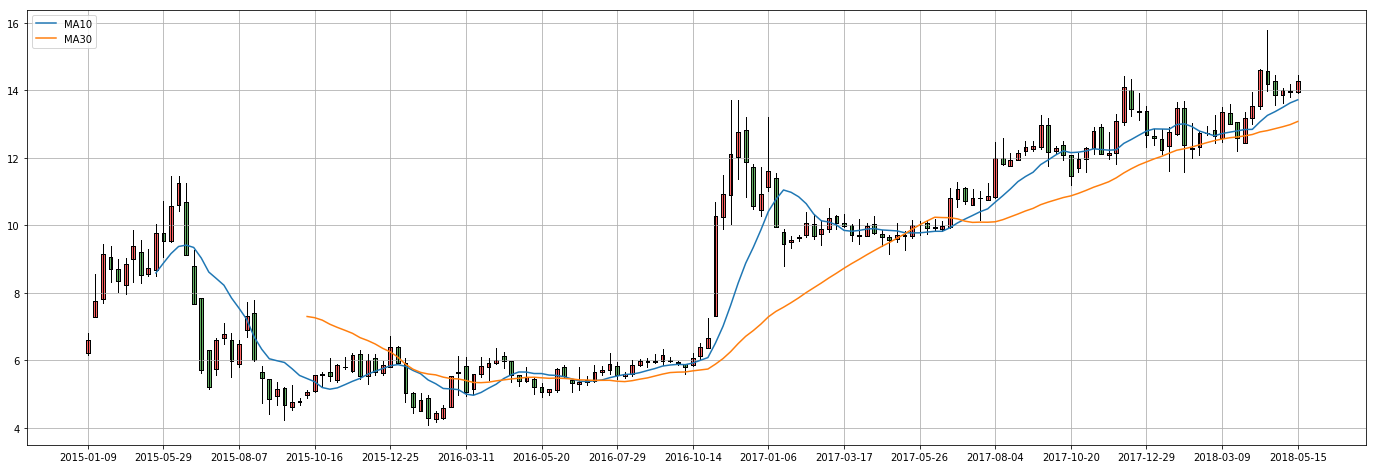

In [134]:

sma_10 = talib.SMA(np.array(data['close']), 10)
sma_30 = talib.SMA(np.array(data['close']), 30)

fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(data['date']), 10))
ax.set_xticklabels(data['date'][::10])
ax.plot(sma_10, label='MA10')
ax.plot(sma_30, label='MA30')
ax.legend(loc='upper left')

mpf.candlestick2_ochl(ax, data['open'], data['close'], data['high'], data['low'],
                     width=0.5, colorup='r', colordown='green',
                     alpha=0.6)
plt.grid()